In [1]:
import os
import json
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import torch 
import matplotlib.pyplot as plt 
from PIL import Image


%matplotlib inline

## Set prelim variables

In [2]:
# set paths 

cwd = os.getcwd()

project_root = os.path.abspath(os.path.join(cwd, ".."))

data_root = os.path.join(project_root, "data", "raw", "AerialWaste")

image_dirs = [os.path.join(data_root, f"images{i}") for i in range(6)]

In [3]:
# set image fullpaths 
def get_full_paths_from_disk(image_dirs):
    full_paths = [] 

    for image_dir_path in image_dirs:
        for file_name in os.listdir(image_dir_path):
            file_path = os.path.join(image_dir_path, file_name)
            full_paths.append(file_path)
    
    print(f"Total images found: {len(full_paths)}")

get_full_paths_from_disk(image_dirs)

Total images found: 9964


In [7]:
path = f'{data_root}/training.json'

with open(path, "r") as f:
    train_json_data = json.load(f)

images_data=train_json_data['images']
df = pd.DataFrame(images_data)
print(f"Labels:{list(df.columns)}\n")
    
# print train json labels 


Labels:['id', 'file_name', 'severity', 'site_type', 'valid_fine_grain', 'width', 'height', 'evidence', 'is_candidate_location', 'categories']



In [10]:
path = f'{data_root}/testing.json'

with open(path, "r") as f:
    test_json_data = json.load(f)

In [11]:
def get_image_path(file_name, image_dirs):
    for dir_path in image_dirs:
        full_path = os.path.join(dir_path, file_name)
        if os.path.exists(full_path):
            return full_path
    return None

train_files = [img['file_name'] for img in train_json_data['images']]
train_full_paths = [get_image_path(f, image_dirs) for f in train_files]
train_full_paths = [p for p in train_full_paths if p is not None]


test_files = [img['file_name'] for img in test_json_data['images']]
test_full_paths = [get_image_path(f, image_dirs) for f in test_files]
test_full_paths = [p for p in test_full_paths if p is not None]


print("Train images available:", len(train_full_paths))
print("Test images available:", len(test_full_paths))

Train images available: 6327
Test images available: 1800


## EDA on train data

In [22]:
df['is_candidate_location'].value_counts()

is_candidate_location
0    6064
1    3032
Name: count, dtype: int64

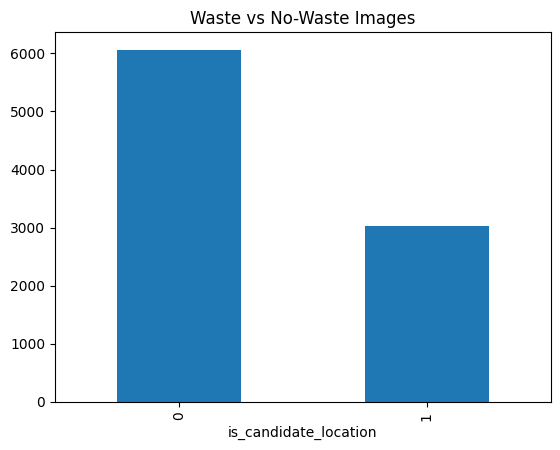

In [23]:
df['is_candidate_location'].value_counts().plot(kind="bar")
plt.title("Waste vs No-Waste Images")
plt.show()

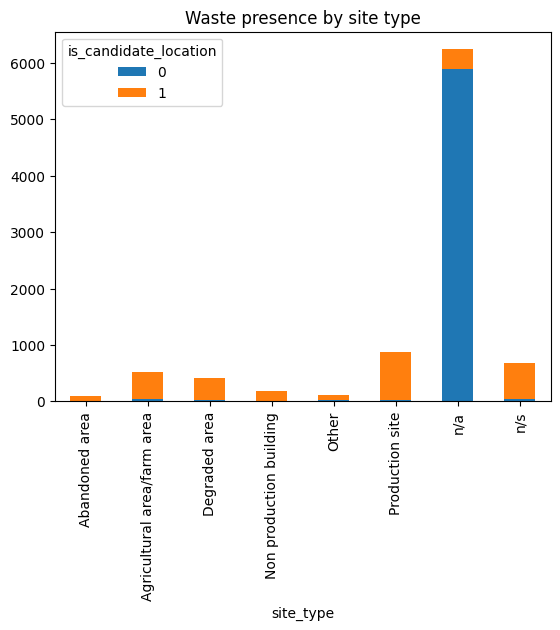

In [24]:
pd.crosstab(df["site_type"], df["is_candidate_location"]).plot(kind="bar", stacked=True)
plt.title("Waste presence by site type")
plt.show()


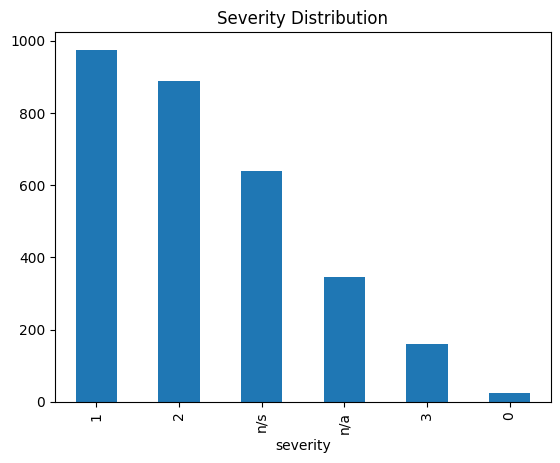

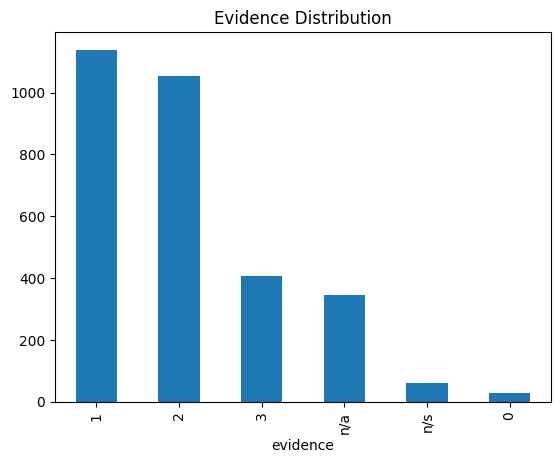

In [25]:
candidates = df[df["is_candidate_location"] == 1]
plt.figure()
candidates["severity"].value_counts().plot(kind="bar", title="Severity Distribution")
plt.show()

plt.figure()
candidates["evidence"].value_counts().plot(kind="bar", title="Evidence Distribution")
plt.show()

In [26]:
# check sample image

In [27]:
list_paths=list(df['full_path'])

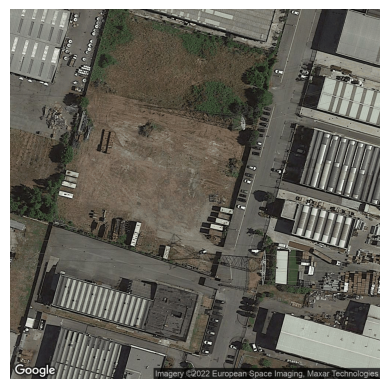

In [30]:
img=Image.open(list_paths[1])
plt.imshow(img)
plt.axis("off")
plt.show()